# Implementing Linear Regression Model in Python

In [10]:
#Importing necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [11]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


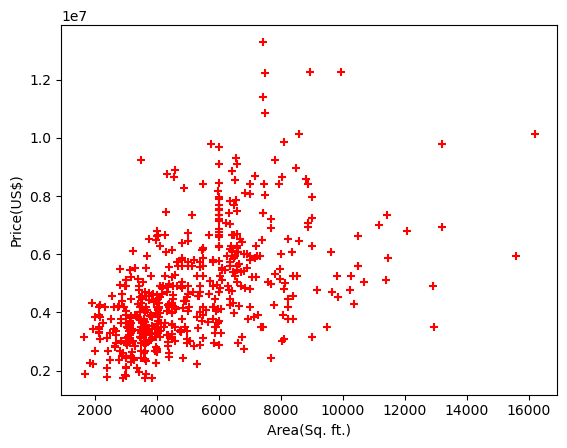

In [12]:
plt.xlabel('Area(Sq. ft.)')
plt.ylabel('Price(US$)')
plt.scatter(df['area'], df['price'], color='red', marker='+')

In [16]:
reg= LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [18]:
reg.predict([[3300]])

C:\Users\SMART\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3911825.63349662])

In [20]:
reg.coef_

array([461.97489427])

In [22]:
reg.intercept_

2387308.4823964313

In [24]:
461.97489427*3300+2387308.4823964313

3911825.6334874313

# Implenenting Multiple Linear Regression in Python

In [31]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

#reading the dataset
dataset=pd.read_csv('50_Startups.csv')
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1].values
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [37]:
X

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [49]:
Y_pred= regressor.predict(X_test)

In [52]:
df=pd.DataFrame({'Real Values':Y_test, 'Predicted_Values':Y_pred})

In [54]:
df

,Real Values,Predicted_Values
0,149759.96,155060.216775
1,108733.99,110871.137012
2,182901.99,172686.194800
3,105733.54,112934.351974
4,81229.06,66682.711037
5,71498.49,69758.905646
6,89949.14,87989.024245
7,111313.02,116391.663067
8,166187.94,173529.267797
9,124266.90,130416.251273


In [56]:
#RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

7244.591015689903
